Gradient Descent Optimization of sin(5*pi*x)/(5*pi*x) function

In [ ]:
import torch
import torchvision
import pandas as pd
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
def function(x):
    return torch.sin(5*np.pi*x)/(5*np.pi*x)

def grad(x):
    return (torch.cos(5*np.pi*x) - torch.sin(5*np.pi*x)/(5*np.pi*x))/(5*np.pi*x)

x = torch.tensor([2.0], requires_grad=True)


In [ ]:
lr = 0.01

x_list = [x.item()]

# gradient descent calculation for 8 iterations
for i in range(8):
    y = function(x)
    y.backward()
    x.data = x.data - lr * x.grad
    x.grad.zero_()
    x_list.append(x.item())

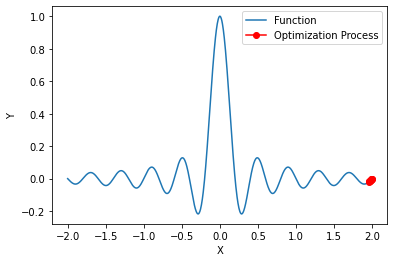

In [ ]:
X = np.linspace(-2, 2, 1000)
Y = function(torch.tensor(X)).detach().numpy()
plt.plot(X, Y, label="Function")
plt.plot(x_list, [function(torch.tensor([x])).item() for x in x_list], 'ro-', label="Optimization Process")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Principle Component Analysis

In [ ]:
X = torch.linspace(-10,10,200).reshape(-1,1)
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))

In [ ]:
def CalculateParams(model):
    val = sum(params.numel() for params in model.parameters() if params.requires_grad)
    return val

In [ ]:
#Creating Model
class Model(nn.Module):
    def __init__(self, in_features=1, h1=5, h2=10, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model=Model()


In [ ]:
lay1_cons = 1 * 5
lay2_cons = 5 * 10
lay3_cons = 10 * 1
tot_mod_cons = lay1_cons + lay2_cons + lay3_cons

In [ ]:
no_iterations = 8
epochs = 30
epoch_num = int(epochs / 3)
c = 0
modloss=[]
whole_mod_weights_tensor = np.zeros((no_iterations * epoch_num, tot_mod_cons))


In [ ]:
for train in range(no_iterations):
    model = Model()
    criterion_loss = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.001)
    for i in range(epochs):
        i += 1
        y_pred = model.forward(X)
        trn_loss = criterion_loss(y_pred, y)
        modloss.append(trn_loss)

        optim.zero_grad()
        trn_loss.backward()
        optim.step()
        if i % 3 == 0:
            layer1_weights = torch.reshape(torch.flatten(model.fc1.weight), (1, lay1_cons))
            layer2_weights  = torch.reshape(torch.flatten(model.fc2.weight), (1, lay2_cons))
            layer3_weights  = torch.reshape(torch.flatten(model.fc3.weight), (1, lay3_cons))
            total_lay1_2 = torch.cat((layer2_weights , layer1_weights), dim=1)
            whole_mod_weights = torch.cat((total_lay1_2, layer3_weights), dim=1)
            whole_mod_weights_tensor[c] = whole_mod_weights.detach().numpy()
            c += 1

In [ ]:
pca = PCA(n_components=2)
reduced_weights = pca.fit_transform(whole_mod_weights_tensor)

***With the first principal component on the x-axis and the second principal component on the y-axis of a scatter plot, the model runs PCA on the gathered weights to decrease their dimension to two.***

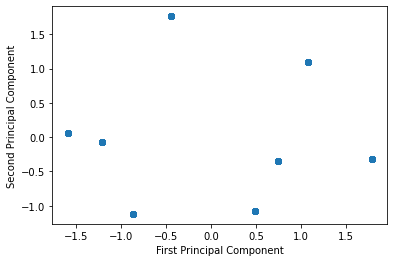

In [ ]:
plt.scatter(reduced_weights[:, 0], reduced_weights[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()